In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [242]:
titanic_train_dataset = pd.read_csv('train.csv')
titanic_test_dataset = pd.read_csv('test.csv')

In [243]:
titanic_train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [244]:
titanic_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [245]:
titanic_train_dataset.shape

(891, 12)

In [246]:
titanic_train_dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Observations -
1. Passenger Id does not seem to be contributing to survival, can be dropped.
2. Cabin information is null in a lot of entries, this feature can be dropped straightaway.
3. Name and Ticket features can also be dropped as I do not feel that Name and Ticket contribute to survival.
4. Port of embarkation seems a feature that can be dropped but we'll have to see survival distribution based on port of embarkation.
5. Age, Embark to be imputed with meaningful values for analysis

# Descriptive Statistics

In [247]:
titanic_train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [248]:
titanic_train_dataset.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mamee, Mr. Hanna",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


#### Observations
1. Out of a set of 891 people, only 38% survived.
2. Mean age of the passengers on board was 30 with outliers as 75th percentile age is 38 and max is 80.
3. Most of the people were travelling alone as 75th percentile for both sibsp and parch are 1 and 0.
4. Mean fare is about 32 however the data seems skewed because of outliers as 75th percentile is 32 and max is 512.
5. Most of the passengers on board were men.
6. Most of the passengers embarked from Southhampton port.
7. Selected features thus far - Pclass, Age, SibSp, Parch, Fare, Sex, Embarked

# Univariate Analysis

#### Target variable

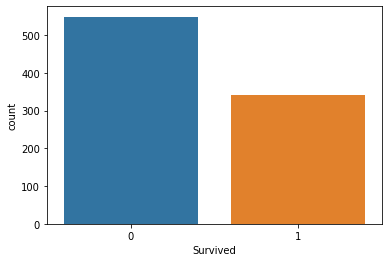

In [249]:
sns.countplot(titanic_train_dataset['Survived'])

#### Numerical features

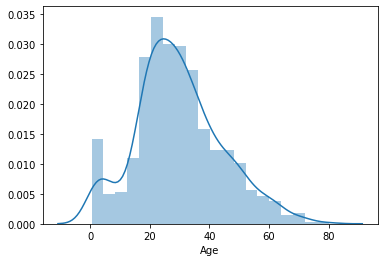

In [250]:
sns.distplot(titanic_train_dataset['Age'].dropna(), kde = True)

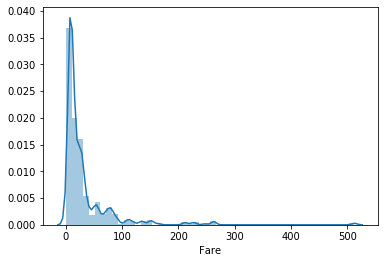

In [251]:
sns.distplot(titanic_train_dataset['Fare'].dropna(), kde = True)

#### Categorical features

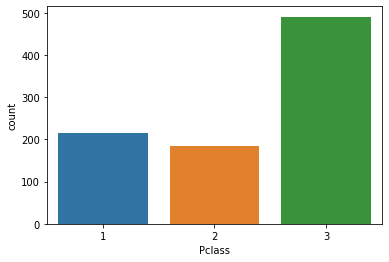

In [252]:
sns.countplot(titanic_train_dataset['Pclass'])

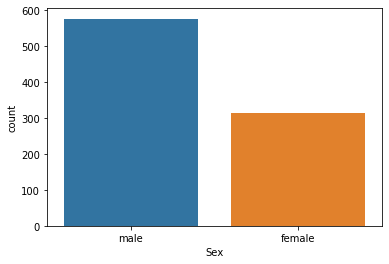

In [253]:
sns.countplot(titanic_train_dataset['Sex'])

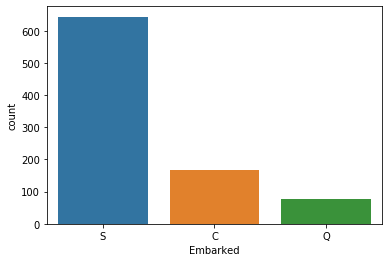

In [254]:
sns.countplot(titanic_train_dataset['Embarked'])

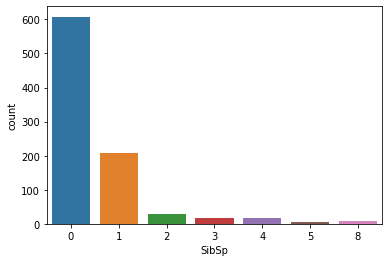

In [255]:
sns.countplot(titanic_train_dataset['SibSp'].dropna())

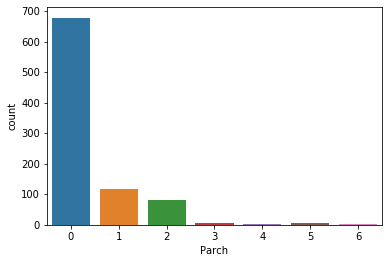

In [256]:
sns.countplot(titanic_train_dataset['Parch'].dropna())

#### Observations
1. Majority of passengers perished.
2. Age is does not follow normal distribution, it has a skewed distribution.
3. Fare also has a skewed distribution towards the left.
4. Most of the passengers were class 3 passengers ie. lower class.
5. Most of the passengers on board were men.
6. Most passengers boarded from Southhampton.
7. Most of the passengers were travelling without family.

# Bivariate Analysis

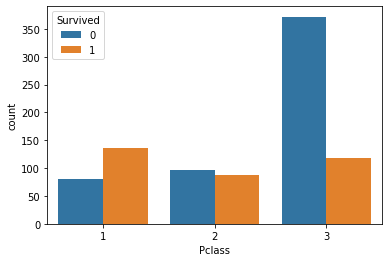

In [257]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_train_dataset)

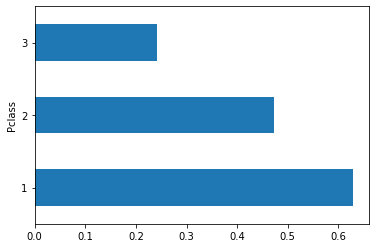

In [258]:
titanic_train_dataset.groupby('Pclass')['Survived'].mean().plot(kind='barh')

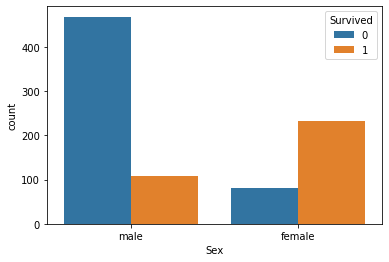

In [259]:
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_train_dataset)

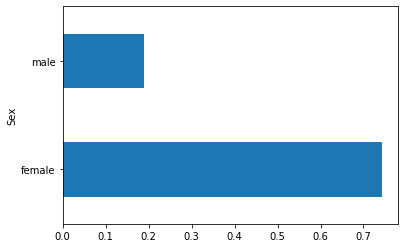

In [260]:
titanic_train_dataset.groupby('Sex')['Survived'].mean().plot(kind = 'barh')

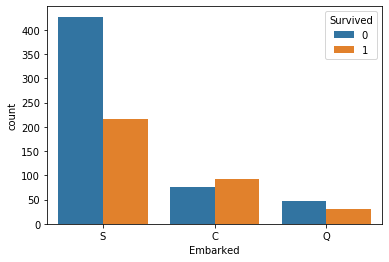

In [261]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = titanic_train_dataset)

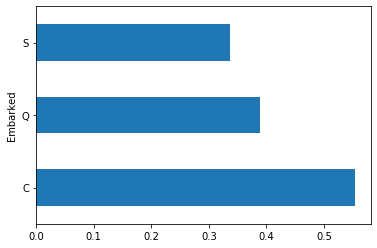

In [262]:
titanic_train_dataset.groupby('Embarked')['Survived'].mean().plot(kind = 'barh')

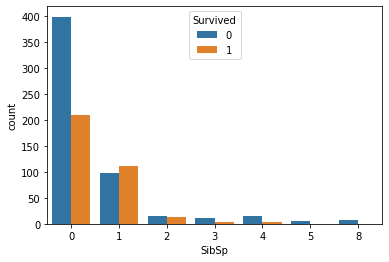

In [263]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic_train_dataset)

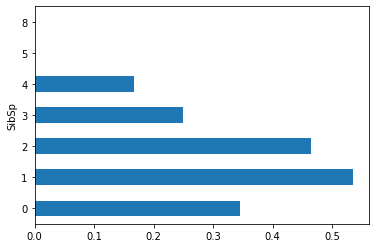

In [264]:
titanic_train_dataset.groupby('SibSp')['Survived'].mean().plot(kind = 'barh')

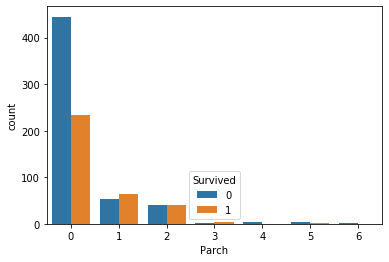

In [265]:
sns.countplot(x = 'Parch', hue = 'Survived', data = titanic_train_dataset)

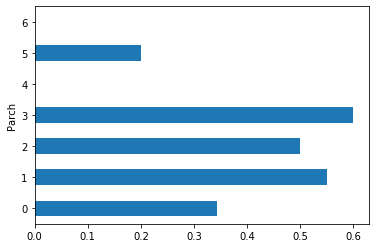

In [266]:
titanic_train_dataset.groupby('Parch')['Survived'].mean().plot(kind = 'barh')

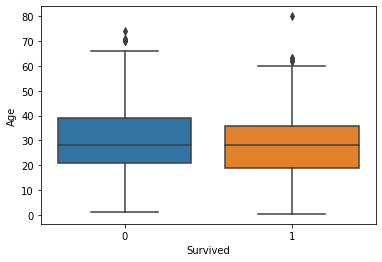

In [267]:
sns.boxplot(x = "Survived", y = "Age", data = titanic_train_dataset)

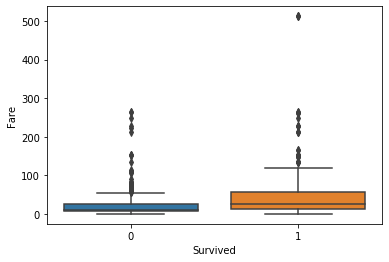

In [268]:
sns.boxplot(x = "Survived", y = "Fare", data = titanic_train_dataset)

#### Observations
1. Passengers having PClass 1 had highest survival rate - depicts that socio economic status impacted survival.
2. Females had more than 75% survival rate.
3. Passengers boarding from Chebourgh had the highest survival rate.
4. Passengers travelling with family - either Parch/SibSp had higher survival rates.
5. Age does not seem helpful directly - requires transformation.
6. Passengers who paid more fare had a higher survival rate.

# Multivariate EDA

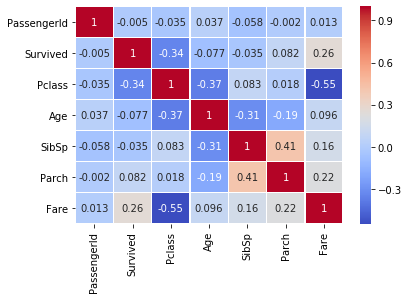

In [269]:
corr_map = titanic_train_dataset.corr().round(3)
sns.heatmap(corr_map, annot = True, cmap = 'coolwarm', linewidths = 0.5)

#### Observations
1. Since none of the features are highly correlated with each other, we need not get rid of any features. 
2. Since Age is highly correlated with PClass, the missing values in Age can be replaced with median/mean age grouped by PClass. 
3. Missing values for Embarked can be replaced by the mode of Embarked feature.
4. Age is not directly correlated with survival, so, it needs to be transformed.
5. Sex has to be binary encoded.
6. Fare needs to be scaled.
7. PassengerId needs to be dropped.

In [273]:
titanic_train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [274]:
X_train = titanic_train_dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [275]:
X_test = titanic_test_dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [276]:
y_train = titanic_train_dataset[['Survived']]
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [277]:
X_train = X_train.assign(Age = X_train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median())))

In [278]:
X_test = X_test.assign(Age = X_test.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median())))

In [279]:
X_test = X_test.assign(Fare = X_test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median())))

In [280]:
X_train['Embarked'] = X_train['Embarked'].fillna(X_train['Embarked'].mode()[0])
X_test['Embarked'] = X_test['Embarked'].fillna(X_test['Embarked'].mode()[0])

In [281]:
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

In [282]:
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = [0, 1, 2, 3, 4]

X_train['Age'] = pd.cut(X_train['Age'], bins = age_bins, labels = age_labels).astype(int)
X_test['Age'] = pd.cut(X_test['Age'], bins = age_bins, labels = age_labels).astype(int)

In [283]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[['Fare']])

X_train['Fare'] = scaler.transform(X_train[['Fare']])
X_test['Fare'] = scaler.transform(X_test[['Fare']])

In [284]:
X_train['isAlone'] = ((X_train['SibSp'] > 0) | (X_train['Parch'] > 0)).astype(int)
X_test['isAlone'] = ((X_test['SibSp'] > 0) | (X_test['Parch'] > 0)).astype(int)

In [285]:
X_train['Embarked'] = X_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
X_test['Embarked'] = X_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [292]:
X_train = X_train.drop(['SibSp', 'Parch'], axis=1)
X_test = X_test.drop(['SibSp', 'Parch'], axis=1)

In [294]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,isAlone
0,3,0,2,0.014151,0,1
1,1,1,3,0.139136,1,1
2,3,1,2,0.015469,0,0
3,1,1,2,0.103644,0,1
4,3,0,2,0.015713,0,0


In [295]:
X_train.shape

(891, 6)

In [296]:
y_train.shape

(891, 1)

In [297]:
X_test.shape

(418, 6)

In [299]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.13

In [304]:
submission = pd.DataFrame({
        "PassengerId": titanic_test_dataset["PassengerId"],
        "Survived": Y_pred
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [305]:
submission.to_csv('/submission.csv', index=False)